# Covid-19 Data Analysis

Exploring covid-19 data using the public dataset: https://covid.ourworldindata.org

Sections in analysis:
1. Understanding the Data
2. Covid 19 World Analysis - Most Recent Info
3. World Covid-19 Growth Over Time
4. Confirmed Cases in Each Country
5. Mapping Covid Around the World
6. Evolution of Confirmed Cases PM
7. Comparing Continents & Countries

# 1. Understanding the Data

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

In [ ]:
# Download dataset
url='https://covid.ourworldindata.org/data/owid-covid-data.csv'
df_covid = pd.read_csv(url)
df_covid.head()

#### Summary of missing data

In [94]:
# Use a list comprehension to get pecentage of NaNs
NAN = [(c, df_covid[c].isna().mean()*100) for c in df]

# We name the columns appropriately 
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

column_name  percentage
0                                  iso_code    0.000000
1                                 continent    6.005363
2                                  location    0.000000
3                                      date    0.000000
4                               total_cases    1.802868
..                                      ...         ...
62                  human_development_index   18.014201
63     excess_mortality_cumulative_absolute   96.562968
64              excess_mortality_cumulative   96.562968
65                         excess_mortality   96.562968
66  excess_mortality_cumulative_per_million   96.562968

[67 rows x 2 columns]

#### How many locations do we have and what are the names?

In [95]:
print(len(df_covid['location'].unique()))
print(df_covid['location'].unique())

238
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 'Gh

## 2. Covid 19 World Analysis - Most Recent Info

In [97]:
# Delete World Summary Figures
df = df_covid.drop(df[df.location == 'World'].index)

# Getting the most recent date (max gives u the latest date)
df_most_recent = df[df['date'] == max(df['date'])].reset_index()
df_most_recent.head()

index  iso_code continent     location        date  total_cases  new_cases  \
0    708       AFG      Asia  Afghanistan  2022-02-01     163555.0      629.0   
1   1428  OWID_AFR       NaN       Africa  2022-02-01   10877658.0    25645.0   
2   2136       ALB    Europe      Albania  2022-02-01     258543.0        NaN   
3   2844       DZA    Africa      Algeria  2022-02-01     253520.0     1403.0   
4   3546       AND    Europe      Andorra  2022-02-01      35958.0        NaN   

   new_cases_smoothed  total_deaths  new_deaths  ...  female_smokers  \
0             471.857        7417.0         3.0  ...             NaN   
1           28384.000      239394.0       435.0  ...             NaN   
2                 NaN        3346.0         NaN  ...             7.1   
3            1730.571        6593.0        14.0  ...             0.7   
4                 NaN         145.0         0.0  ...            29.0   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                        0.50   
1           NaN                     NaN                         NaN   
2          51.2                     NaN                        2.89   
3          30.4                  83.741                        1.90   
4          37.8                     NaN                         NaN   

   life_expectancy  human_development_index  \
0            64.83                    0.511   
1              NaN                      NaN   
2            78.57                    0.795   
3            76.88                    0.748   
4            83.73                    0.868   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 68 columns]

### Creating a Summary Table

In [5]:
# drop the NaNs in continent column
df_most_recent.dropna(subset=['continent'],inplace=True)
df_most_recent.head()

index iso_code continent     location        date  total_cases  new_cases  \
0    708      AFG      Asia  Afghanistan  2022-02-01     163555.0      629.0   
2   2136      ALB    Europe      Albania  2022-02-01     258543.0        NaN   
3   2844      DZA    Africa      Algeria  2022-02-01     253520.0     1403.0   
4   3546      AND    Europe      Andorra  2022-02-01      35958.0        NaN   
5   4230      AGO    Africa       Angola  2022-02-01      98226.0      110.0   

   new_cases_smoothed  total_deaths  new_deaths  ...  female_smokers  \
0             471.857        7417.0         3.0  ...             NaN   
2                 NaN        3346.0         NaN  ...             7.1   
3            1730.571        6593.0        14.0  ...             0.7   
4                 NaN         145.0         0.0  ...            29.0   
5              90.286        1895.0         0.0  ...             NaN   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                        0.50   
2          51.2                     NaN                        2.89   
3          30.4                  83.741                        1.90   
4          37.8                     NaN                         NaN   
5           NaN                  26.664                         NaN   

   life_expectancy  human_development_index  \
0            64.83                    0.511   
2            78.57                    0.795   
3            76.88                    0.748   
4            83.73                    0.868   
5            61.15                    0.581   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
5                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  
5               NaN                                      NaN  

[5 rows x 68 columns]

In [98]:
# group data by most recent
df_world_summary = df_most_recent.groupby(["date"])[["total_cases","new_cases","new_deaths","total_deaths"]].sum().reset_index()

# Create Column headers/labels
labels = ["Last Update", "Total Confirmed","New Cases","New Deaths","Total Deaths"]

# plot the summary table
fig = go.Figure(data=[go.Table(header = dict(values=labels),
                 cells=dict(values=df_world_summary.loc[0,["date","total_cases","new_cases","new_deaths","total_deaths"]]))
                     ])
fig.update_layout(title='Covid-19 World Summary: ',)
fig.show()

## 3. World Covid-19 Growth Over Time

#### Clean data and group covid cases and deaths

In [99]:
# Delete World and continent Summary Figures
df.drop(df[df.location == 'World'].index, inplace=True)
df.dropna(subset=['continent'],inplace=True)

In [100]:
# group into new table
df_over_time = df.groupby(["date"])[["total_cases","new_cases","total_deaths","new_deaths"]].sum().reset_index().sort_values("date",ascending=True).reset_index(drop=True)
df_over_time.head()

date  total_cases  new_cases  total_deaths  new_deaths
0  2020-01-01          0.0        0.0           0.0         0.0
1  2020-01-02          0.0        0.0           0.0         0.0
2  2020-01-03          0.0        0.0           0.0         0.0
3  2020-01-04          0.0        0.0           0.0         0.0
4  2020-01-05          0.0        0.0           0.0         0.0

In [102]:
# drop current day incase of incomplete values
from datetime import date
today = date.today()
current_date = today.strftime("%Y-%m-%d")

# drop current day incase of incomplete values
df_over_time.drop(df_over_time[df_over_time.date == current_date].index, inplace = True)

### Plot total cases and deaths

In [105]:
# Barplot of total cases
fig = go.Figure(go.Bar(
            x=df_over_time['date'],
            y=df_over_time['total_cases'],
           ))
fig.update_layout(
    title='Total Covid-19 confirmed cases worldwide',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Days",
)
fig.show()

In [11]:
# plot the rise in total deaths
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_over_time.index, y=df_over_time['total_deaths'],
                    mode='lines',marker_color='red',
                    name='Total Deaths',line=dict( dash='dot')))
fig.update_layout(
    title='Total Covid-19 Deaths worldwide',
        template='plotly_white',
      yaxis_title="Number of Deaths",
    xaxis_title="Days",

)
fig.show()

### Plot daily new cases and deaths

In [12]:
# Plot daily new cases worldwide
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_over_time.date, y=df_over_time['new_cases'],
                    mode='lines',marker_color='green',
                    name='New Case Daily',line=dict( dash='dot')))
fig.update_layout(
    title='Daily new cases worldwide',
        template='plotly_white',
      yaxis_title="New Cases",
    xaxis_title="Days",

)
fig.show()

In [13]:
# Plot daily new deaths worldwide
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_over_time.date, y=df_over_time['new_deaths'],
                    mode='lines',marker_color='red',
                    name='New Case Daily',line=dict( dash='dot')))
fig.update_layout(
    title='Daily new deaths worldwide',
        template='plotly_white',
      yaxis_title="New Cases",
    xaxis_title="Days",
)
fig.show()

## 4. Plot by Country

In [53]:
# collate the sum of new cases/deaths to get per location data
df_per_country = df.groupby("location")[["new_cases","new_deaths"]].sum().reset_index()

In [54]:
# create new df grouped by country
df_per_country.columns = ['Country', 'Total Cases', 'Total Deaths']
df_per_country = df_per_country.astype({"Country": str, "Total Cases": int, "Total Deaths":int})
df_per_country.head()

Country  Total Cases  Total Deaths
0  Afghanistan       163555          7417
1      Albania       258543          3346
2      Algeria       253520          6593
3      Andorra        35958           145
4       Angola        98226          1895

### Total cases by country

Text(0.5, 1.0, 'Lowest')

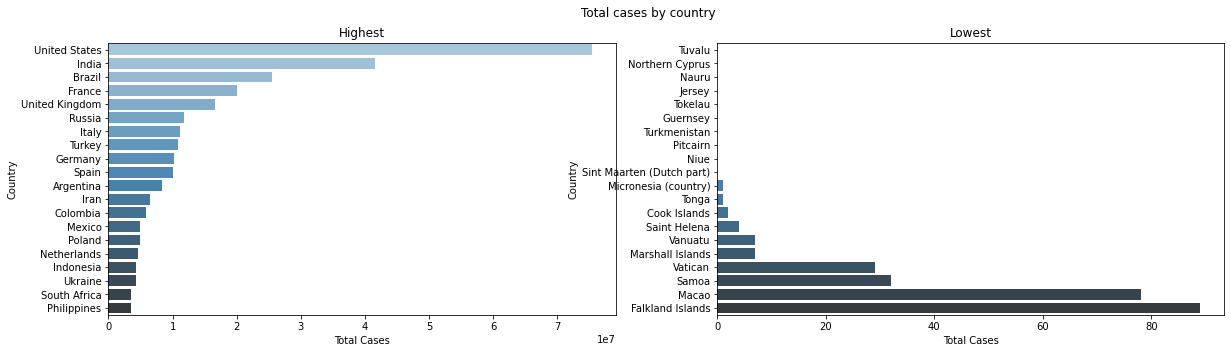

In [55]:
# plot both the highest and lowest cases per country
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Total cases by country')

data_highest_20 = df_per_country.sort_values("Total Cases",ascending=False)[:20]
sns.barplot(ax=axes[0],x=data_highest_20['Total Cases'], y=data_highest_20['Country'], data=data_highest_20,
                 palette="Blues_d")
axes[0].set_title('Highest')

data_lowest_20 = df_per_country.sort_values("Total Cases",ascending=True)[:20]
sns.barplot(ax=axes[1],x=data_lowest_20['Total Cases'], y=data_lowest_20['Country'], data=data_lowest_20,
                 palette="Blues_d")
axes[1].set_title('Lowest')

### Total Deaths by country

Text(0.5, 1.0, 'Lowest')

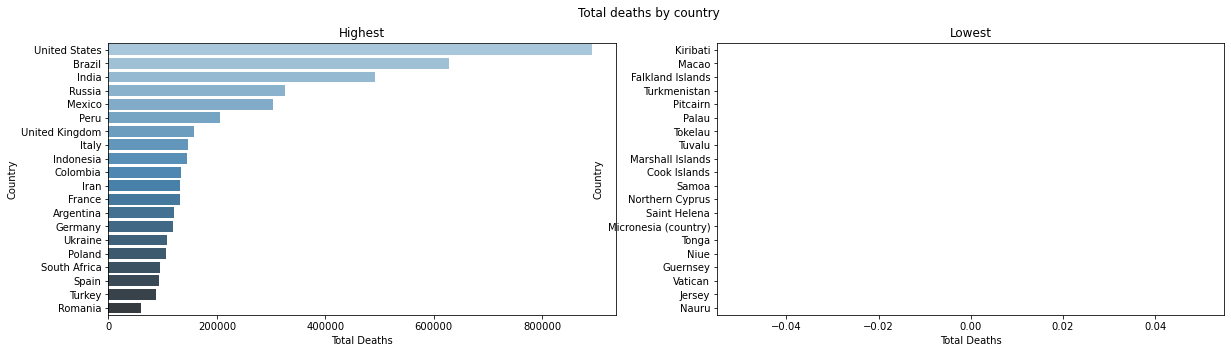

In [56]:
# plot both the highest and lowest deaths per country
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Total deaths by country')

data_highest_20 = df_per_country.sort_values("Total Deaths",ascending=False)[:20]
sns.barplot(ax=axes[0],x=data_highest_20['Total Deaths'], y=data_highest_20['Country'], data=data_highest_20,
                 palette="Blues_d")
axes[0].set_title('Highest')

data_lowest_20 = df_per_country.sort_values("Total Deaths",ascending=True)[:20]
sns.barplot(ax=axes[1],x=data_lowest_20['Total Deaths'], y=data_lowest_20['Country'], data=data_lowest_20,
                 palette="Blues_d")
axes[1].set_title('Lowest')

# 5. Maping Covid-19 on the world map

In [57]:
# Plot total number of cases on a world map
fig = px.choropleth(df_per_country, locations=df_per_country['Country'],
                    color=df_per_country['Total Deaths'],locationmode='country names', 
                    hover_name=df_per_country['Country'], 
                    color_continuous_scale=px.colors.sequential.OrRd,template='plotly_white', )
fig.update_layout(
    title='Total deaths worldwide',
)
fig.show()

## Animated plot of total cases in Europe from 2020-22

In [58]:
# reformat data in chronological order
df_anim = df.sort_values("date",ascending=True)
df_anim = df_anim[df_anim['continent'] == 'Europe']

In [59]:
fig = px.choropleth(df_anim, locations=df_anim['location'],
                    color=df_anim['total_cases'],
                    locationmode='country names', 
                    hover_name=df_anim['location'], 
                    animation_frame="date",
                    scope='europe',
                    color_continuous_scale='Inferno',template='plotly_white')
fig.update_layout(
    title='Animation of total cases in Europe (2020-2022)',
)
fig.show()

## Total cases and deaths per million

In [106]:
# Gather data related to per million cases/deaths
df_per_country_pm = df.groupby(["location"])[["new_cases_per_million","new_deaths_per_million"]].sum().reset_index().sort_values("new_cases_per_million",ascending=False).reset_index(drop=True)
df_per_country_pm.columns = ['Country', 'Total Cases PM', 'Total Deaths PM']
df_per_country_pm = df_per_country_pm.astype({"Country": str, "Total Cases PM": int, "Total Deaths PM":int})

In [61]:
# Plot country and per million cases
fig = px.choropleth(df_per_country_pm, locations=df_per_country_pm['Country'],
                    color=df_per_country_pm['Total Cases PM'],locationmode='country names', 
                    hover_name=df_per_country_pm['Country'], 
                    color_continuous_scale=px.colors.sequential.Viridis,template='plotly_white', )
fig.update_layout(
    title='Confirmed cases per million worldwide',
)
fig.show()

#### Which 5 countries have highest per million cases and deaths?

In [121]:
df_per_country_pm.head(5)

Country  Total Cases PM  Total Deaths PM
0         Andorra          464849             1874
1  Faeroe Islands          422991              387
2       Gibraltar          388382             2997
3      San Marino          378829             3204
4      Seychelles          375998             1556

#### Which 5 countries have highest per million deaths?

In [122]:
df_per_country_pm.sort_values("Total Deaths PM",ascending=False).head(5)

Country  Total Cases PM  Total Deaths PM
87                    Peru           97110             6170
55                Bulgaria          139648             4843
79  Bosnia and Herzegovina          106970             4442
48                 Hungary          162217             4304
5               Montenegro          351240             4088

#### Plot total deaths per million globally

In [62]:
fig = px.choropleth(df_per_country_pm, locations=df_per_country_pm['Country'],
                    color=df_per_country_pm['Total Deaths PM'],
                    locationmode='country names', 
                    hover_name=df_per_country_pm['Country'], 
                    color_continuous_scale=px.colors.sequential.Viridis,template='plotly_white', )
fig.update_layout(
    title='Confirmed deaths per million worldwide',
)
fig.show()

# 7. Comparing Continents & Countries

#### Get total cases per million per continent

In [125]:
# Get total cases per million per continent
df_per_continent_pm = df.groupby(["continent"])[["new_cases_per_million","new_deaths_per_million"]].sum().reset_index().sort_values("new_cases_per_million",ascending=False).reset_index(drop=True)
df_per_continent_pm.columns = ['Continent', 'Total Cases PM', 'Total Deaths PM']
df_per_continent_pm = df_per_continent_pm.astype({"Continent": str, "Total Cases PM": int, "Total Deaths PM":int})
df_per_continent_pm.head()

Continent  Total Cases PM  Total Deaths PM
0         Europe        10612503           101503
1  North America         4036931            37704
2           Asia         3074847            26963
3  South America         1263700            27552
4         Africa         1234824            15793


#### Retrieve data for select continents to compare

In [188]:
# group by continent and date to plot continent cases/deaths over time
gp_cont = df.groupby(['continent','date']).sum().reset_index()
gp_cont.dropna(subset=['continent'],inplace=True)

#### Plot continent cases/deaths over time

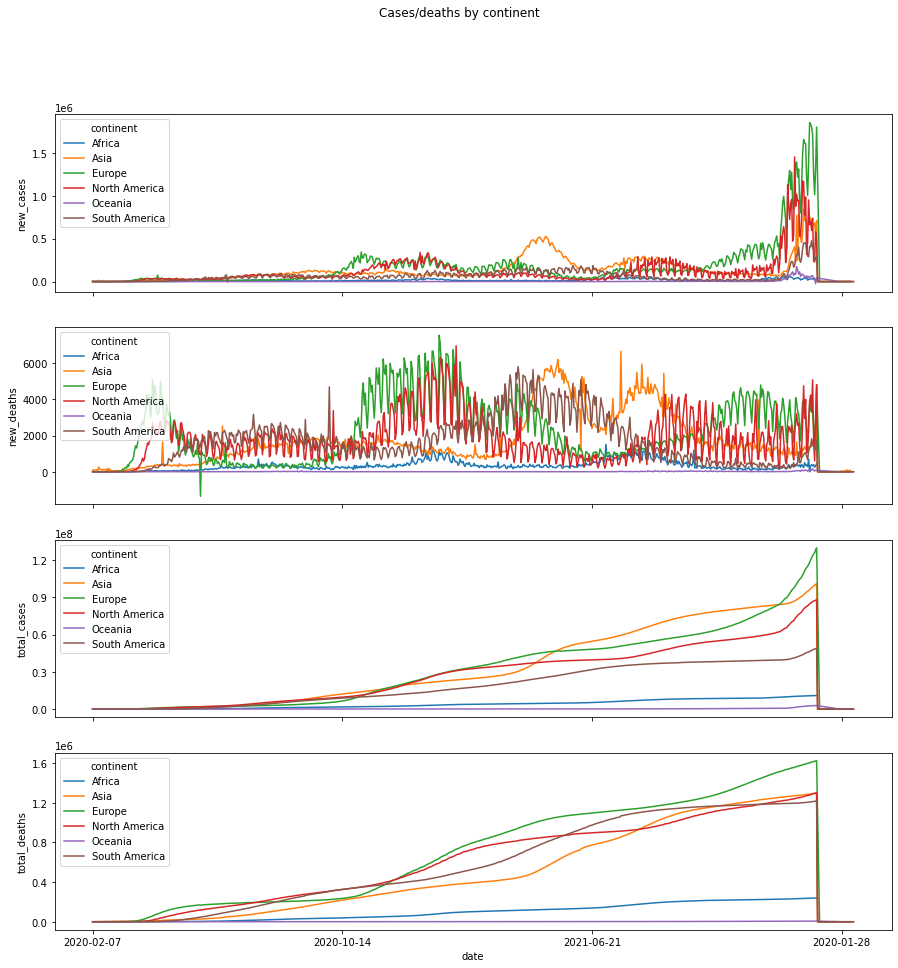

In [189]:
fig, ax = plt.subplots(4,1, figsize=(15, 15), sharex=True)
fig.suptitle('Cases/deaths by continent')

sns.lineplot(ax=ax[0],data=gp_cont,x='date',y='new_cases',hue='continent')

sns.lineplot(ax=ax[1],data=gp_cont,x='date',y='new_deaths',hue='continent')

sns.lineplot(ax=ax[2],data=gp_cont,x='date',y='total_cases',hue='continent')

sns.lineplot(ax=ax[3],data=gp_cont,x='date',y='total_deaths',hue='continent')

# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(4))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))

### In the above, we can see the different waves of cases and deaths per continent. 